# Clustering

In this file we will use clustering to clean our dataset and find communities

In [1]:
# Imports
import numpy as np # For arrays
import networkx as nx # For graphs
import networkx.algorithms.community as nx_comm # Louvain Algorithm
import pandas as pd # Load and save csv files
import matplotlib.pyplot as plt # Plot results
from fa2 import ForceAtlas2 # Gives position of nodes for results
import cmasher as cmr # Better color maps


In [2]:
# Global variables
seed = 1 # seed for louvain algorithm

# Graph creation

In [3]:
# Read the csv files
df_edges = pd.read_csv("csv_outputs/graph_channels_large.csv", sep=';')
# We drop the edges that have weight less than 16 for better plots and minor performance improvements as well as better graphs
# This is because there are a lot of connections with weight 1
df_edges = df_edges.drop(df_edges[df_edges.weight < 16].index)
display(df_edges.head())


,source,target,weight
0,0,1,12881
1,0,2,8482
2,0,3,20346
3,0,4,14911
5,0,6,1268


In [4]:
# Creating the graph from our edges
G = nx.from_pandas_edgelist(df_edges, edge_attr=True)
G.remove_nodes_from(list(nx.isolates(G))) # This line removes all the nodes that are now unconnected because we removed some edges
# Then we remove all nodes that have degree less than 41. 41 is equal to sqrt of the highest degree node in the graph 
remove = [node for node,degree in dict(G.degree()).items() if degree < 41]
G.remove_nodes_from(remove)

# Louvain algorithm

In this part we run the louvain algorithm to detect communities. The louvain algorithm starts with each node being a community and then checks for each node if it should join another community. So the algorithm starts by finding local communities and gradually makes bigger communities. The algorithm runs in `O(n * log(n))`

In [5]:
louvain_partitions = nx_comm.louvain_communities(G, resolution=1.2, threshold=1e-1,seed=seed)
print("We have have found {nbr} communities".format(nbr=len(louvain_partitions)))

We have have found 8 communities


In [6]:
for idx in range(len(louvain_partitions)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_partitions[idx])))

Community number 0 has 333 members
Community number 1 has 2 members
Community number 2 has 139 members
Community number 3 has 320 members
Community number 4 has 2 members
Community number 5 has 191 members
Community number 6 has 260 members
Community number 7 has 430 members


In [7]:
display(louvain_partitions[0])

{6,
 7,
 9,
 10,
 15,
 37,
 53,
 61,
 67,
 78,
 88,
 96,
 122,
 137,
 142,
 173,
 191,
 200,
 215,
 246,
 252,
 266,
 267,
 280,
 313,
 314,
 326,
 331,
 344,
 362,
 374,
 384,
 391,
 397,
 412,
 413,
 428,
 442,
 459,
 463,
 466,
 469,
 472,
 523,
 531,
 534,
 550,
 551,
 559,
 561,
 582,
 590,
 593,
 610,
 622,
 624,
 626,
 627,
 630,
 642,
 651,
 663,
 669,
 674,
 683,
 691,
 692,
 708,
 709,
 714,
 727,
 740,
 741,
 744,
 769,
 784,
 814,
 817,
 821,
 822,
 831,
 839,
 843,
 846,
 847,
 862,
 879,
 896,
 902,
 904,
 909,
 912,
 925,
 928,
 931,
 945,
 946,
 954,
 969,
 971,
 972,
 976,
 985,
 987,
 995,
 997,
 999,
 1006,
 1008,
 1014,
 1021,
 1028,
 1038,
 1039,
 1043,
 1048,
 1050,
 1053,
 1057,
 1061,
 1069,
 1071,
 1078,
 1080,
 1094,
 1098,
 1104,
 1110,
 1113,
 1117,
 1118,
 1122,
 1127,
 1130,
 1132,
 1133,
 1138,
 1150,
 1157,
 1160,
 1162,
 1167,
 1176,
 1182,
 1188,
 1190,
 1206,
 1207,
 1209,
 1218,
 1224,
 1225,
 1237,
 1238,
 1259,
 1260,
 1263,
 1265,
 1266,
 1270,
 1

By printing every community we can quickly find out which communitites are the ones we want to keep or not

We keep community 0, 1, 2, 5, 7 and we discard community 3, 4, 6.


# Graph creation for results

Here we create a graph to show our results. We use the force atlas 2 algorithm for graph position.

In [8]:
forceatlas2 = ForceAtlas2(gravity=0)
posses_1 = forceatlas2.forceatlas2_networkx_layout(G,iterations=1000)

100%|██████████| 1000/1000 [00:30<00:00, 32.40it/s]


BarnesHut Approximation  took  10.70  seconds
Repulsion forces  took  12.57  seconds
Gravitational forces  took  0.07  seconds
Attraction forces  took  6.56  seconds
AdjustSpeedAndApplyForces step  took  0.39  seconds


In [9]:
# Color creation
dict_col={0 : 0, 1 : 0, 2 : 0, 3 : 1, 4 : 1, 5 : 0, 6 : 1, 7 : 0} # Map for communities to their label
mapping = {}
for i, l in enumerate(louvain_partitions):
    list_ = list(l)
    list_.sort()
    for elem in list_:
        mapping[elem] = dict_col.get(i)

for n in G.nodes:
    G.nodes[n]["louvain"] = mapping[n]

# Creating our colormap
cmap = cmr.get_sub_cmap('RdYlGn_r', 0.1, 0.9, N=2)

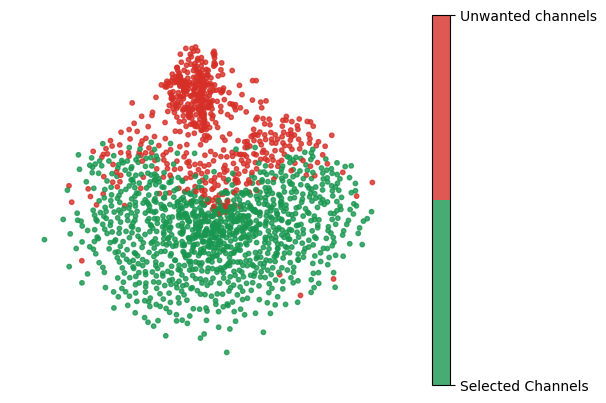

In [10]:
fig, ax = plt.subplots()

nc = nx.draw_networkx_nodes(G, node_size=10, node_color=[G.nodes[n]["louvain"] for n in G.nodes], cmap=cmap, pos=posses_1,alpha=0.8, ax=ax)
ec = nx.draw_networkx_edges(G, width=0.0000, pos=posses_1)

#nx.draw_networkx(G, node_size=10, node_color=[G.nodes[n]["louvain"] for n in G.nodes], cmap='bwr', with_labels=False, width=0.0005,pos=posses)
cb = plt.colorbar(nc, ticks=[0,1])
#cb = plt.colorbar(nc)

yt = cb.ax.set_yticklabels(['Selected Channels', 'Unwanted channels'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('indian_usa_channels.png', bbox_inches='tight', dpi=1200)

# Creating a new subgraph from our clean dataset

First we create a list of our clean channels

In [11]:
# Concatenating the list of our clean partitions
filtered_channels = list(louvain_partitions[0])
filtered_channels = filtered_channels + (list(louvain_partitions[1]))
filtered_channels = filtered_channels + (list(louvain_partitions[2]))
filtered_channels = filtered_channels + (list(louvain_partitions[5]))
filtered_channels = filtered_channels + (list(louvain_partitions[7]))

print("We have {nbr} channels left".format(nbr=len(filtered_channels)))

filtered_channels = sorted(filtered_channels)
filtered_channels_list = filtered_channels
filtered_channels = pd.DataFrame(filtered_channels)


We have 1095 channels left


In [12]:
# creating a csv containing only the "clean" channels
filtered_channels.to_csv("csv_outputs/louvain_filtered_channels_large.csv", sep=';', index=False)

In [13]:
# defining a filter function that returns true if the input is a clean channel
def filter_function(n):
    return n in filtered_channels_list
# using the filter function to create a subgraph
sub_G = nx.subgraph_view(G, filter_node=filter_function)

# Louvain algorithm (bis)

We run the algorithm again on our clean graph.

In [14]:
louvain_communities = nx_comm.louvain_communities(sub_G, resolution=1.1,threshold=1e-1, seed=seed)
print("We have detected {num} communities".format(num=len(louvain_communities)))

We have detected 7 communities


In [15]:
# listing the the number of members for each community
for idx in range(len(louvain_communities)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_communities[idx])))

Community number 0 has 341 members
Community number 1 has 140 members
Community number 2 has 104 members
Community number 3 has 255 members
Community number 4 has 98 members
Community number 5 has 155 members
Community number 6 has 2 members


In [16]:
display(louvain_communities[1])

{23,
 64,
 101,
 153,
 202,
 207,
 211,
 238,
 259,
 310,
 328,
 353,
 386,
 403,
 446,
 468,
 484,
 485,
 499,
 517,
 525,
 557,
 567,
 583,
 612,
 640,
 668,
 673,
 675,
 696,
 703,
 715,
 725,
 735,
 747,
 756,
 770,
 790,
 796,
 802,
 803,
 824,
 857,
 859,
 927,
 951,
 955,
 980,
 993,
 1004,
 1005,
 1018,
 1027,
 1035,
 1056,
 1064,
 1084,
 1089,
 1090,
 1091,
 1147,
 1163,
 1168,
 1196,
 1210,
 1216,
 1251,
 1292,
 1302,
 1334,
 1336,
 1341,
 1347,
 1348,
 1361,
 1380,
 1416,
 1418,
 1420,
 1421,
 1427,
 1508,
 1518,
 1536,
 1538,
 1550,
 1595,
 1601,
 1612,
 1616,
 1618,
 1638,
 1640,
 1670,
 1679,
 1682,
 1685,
 1696,
 1720,
 1733,
 1736,
 1757,
 1764,
 1791,
 1807,
 1812,
 1814,
 1836,
 1852,
 1862,
 1866,
 1901,
 1913,
 1925,
 1933,
 1939,
 1949,
 1970,
 1977,
 1980,
 1990,
 2010,
 2044,
 2070,
 2091,
 2108,
 2109,
 2123,
 2134,
 2157,
 2161,
 2165,
 2177,
 2190,
 2208,
 2225,
 2227,
 2236,
 2240,
 2251}

In [17]:
sub_G = nx.Graph(sub_G)
sub_G.remove_nodes_from(louvain_communities[6])

# Plotting our results

In [18]:
# Adding a louvain attribute to assign colors
mapping = {}
for i, l in enumerate(louvain_communities):
    list_ = list(l)
    list_.sort()
    for elem in list_:
        mapping[elem] =i

for n in sub_G.nodes:
    sub_G.nodes[n]["louvain"] = mapping[n]


In [19]:
# Runing ForceAtlaas2 to generate positions
# gravity = 0 to avoid the graph being too clogged up in the middle, scalingRatio=1.5 to make the repulsion between nodes bigger
forceatlas2 = ForceAtlas2(gravity=0.0000, scalingRatio=1.5, edgeWeightInfluence=0.5, outboundAttractionDistribution=False)
posses = forceatlas2.forceatlas2_networkx_layout(sub_G,iterations=1000)

100%|██████████| 1000/1000 [00:29<00:00, 34.22it/s]

BarnesHut Approximation  took  3.24  seconds
Repulsion forces  took  5.06  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  19.99  seconds
AdjustSpeedAndApplyForces step  took  0.29  seconds


In [20]:
# Getting a colormap. -1 is because we removed the last community
cmap = cmr.get_sub_cmap('CMRmap', 0.15, 0.95, N=len(louvain_communities)-1)

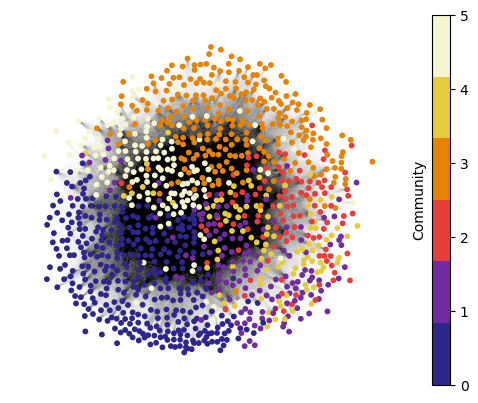

In [21]:
fig, ax = plt.subplots()

nc = nx.draw_networkx_nodes(sub_G, pos=posses, node_size=10, node_color=[sub_G.nodes[n]["louvain"] for n in sub_G.nodes], cmap=cmap, ax=ax)
ec = nx.draw_networkx_edges(sub_G, pos=posses, width=0.0005)

cb = plt.colorbar(nc, ticks=[0,1,2,3,4,5])
plt.ylabel('Community',)
ax.yaxis.set_label_position('right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('louvain_communities.png', dpi=1200, bbox_inches='tight')

# Output
here we create an output csv containing two columns : channel number and its respective louvain community

In [22]:
a0 =list(louvain_communities[0])
a1 =list(louvain_communities[1])
a2 =list(louvain_communities[2])
a3 =list(louvain_communities[3])
a4 =list(louvain_communities[4])
a5 =list(louvain_communities[5])

b0 = list(np.full_like(a0,0))
b1 = list(np.full_like(a1,1))
b2 = list(np.full_like(a2,2))
b3 = list(np.full_like(a3,3))
b4 = list(np.full_like(a4,4))
b5 = list(np.full_like(a5,5))


In [23]:
communities= a0 + a1 + a2 + a3 + a4 + a5
indices = b0 + b1 + b2 + b3 + b4 + b5

In [24]:
d = {'channel': communities, 'community': indices}
df = pd.DataFrame(data=d)
display(df.head())

,channel,community
0,2049,0
1,1028,0
2,6,0
3,7,0
4,9,0


In [25]:
df.to_csv("csv_outputs/louvain_communities_channels_large.csv", sep=';', index=False)